# Industrial Copper Prediction

### Importing Libraries

In [145]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

import time
from datetime import datetime
start_time = time.time()

#Importing Libaries for modeling and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.inspection import permutation_importance

#Importing libraries for plotting graph
import seaborn as sns
import matplotlib.pyplot as plt

### Importing data

In [146]:
def import_data(file_path):
    data = pd.read_csv(file_path)
    df = data.copy(deep=True)
    return (df, data)

# Load the CSV file into a DataFrame
df = import_data("C:\\Users\\ADMIN\\Downloads\\Deepak\\Projects\\Final Project 2\\Copper_Set.xlsx - Result 1.csv")
data = df[1]
df = df[0]

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\1342733078.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [147]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [148]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [149]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


### Correcting Columns Header

In [150]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [151]:
def correcting_column_headers(df):
    dict = {'quantity tons': 'quantity_tons', 'item type': 'item_type', 'delivery date': 'delivery_date', 'delivery date new': 'delivery_date_new'}
    df.rename(columns=dict, inplace=True)
    return df

In [152]:
df = correcting_column_headers(df)
df.columns

Index(['id', 'item_date', 'quantity_tons', 'customer', 'country', 'status',
       'item_type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery_date', 'selling_price'],
      dtype='object')

### Handling Invalid Data

In [153]:
df

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [154]:
def handling_invalid_data(df):
    a=df['material_ref'].str.startswith("000000")
    df['material_ref'][a==True] = np.NaN
    
    df['quantity_tons'].replace('(\D.*)',np.nan,inplace=True, regex=True)
    df['quantity_tons'] = df['quantity_tons'].astype('float64')
    return df

In [155]:
df = handling_invalid_data(df)
df

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\1295016068.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['material_ref'][a==True] = np.NaN


,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,NaN,30200854.0,25.0,Won,W,41.0,0.96,1220.0,NaN,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,NaN,30200854.0,25.0,Won,W,41.0,0.95,1500.0,NaN,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,NaN,30200854.0,25.0,Won,W,41.0,0.71,1250.0,NaN,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,NaN,30200854.0,25.0,Won,W,41.0,0.85,1250.0,NaN,164141591,20200701.0,601.00


### Dropping Irrelevent data

In [156]:
missing_list = []
for i in df.columns:
    missing_list.append([i, df[i].isnull().sum(), df[i].isnull().sum() * 100 / len(df)])
missing_values = pd.DataFrame(data= missing_list, columns=["Column", "Number", "Percentage"])
missing_values

,Column,Number,Percentage
0,id,2,0.001101
1,item_date,1,0.000550
2,quantity_tons,50599,27.851690
3,customer,1,0.000550
4,country,28,0.015412
5,status,2,0.001101
6,item_type,0,0.000000
7,application,24,0.013211
8,thickness,1,0.000550
9,width,0,0.000000


In [157]:
def droping_irrelevent_col(df):
    df = df.drop(['material_ref', 'id'], axis=1)
    return df

In [158]:
df = droping_irrelevent_col(df)
df.columns

Index(['item_date', 'quantity_tons', 'customer', 'country', 'status',
       'item_type', 'application', 'thickness', 'width', 'product_ref',
       'delivery_date', 'selling_price'],
      dtype='object')

### Handling Missing Values

In [159]:
def missing_values(df, data):
    
    cat = [ 'item_type', 'country', 'product_ref', 'status']
    num = [ 'quantity_tons', 'customer', 'application', 'thickness', 'width', 'selling_price']
    
    df['thickness'].fillna(df['thickness'].median(), inplace = True) 
    for i in cat:
        df[i].fillna(df[i].mode()[0], inplace = True) 
    for i in num:
        df[i].fillna(df[i].mean(), inplace = True)
        
    df['item_date'] = df['item_date'].replace([np.nan,None,'null'], df['item_date'].mode()[0])
    df['delivery_date'] = df['delivery_date'].replace([np.nan,None,'null'], df['delivery_date'].mode()[0])
        
    return df

In [160]:
df = missing_values(df,data)
df.isnull().sum()

item_date        0
quantity_tons    0
customer         0
country          0
status           0
item_type        0
application      0
thickness        0
width            0
product_ref      0
delivery_date    0
selling_price    0
dtype: int64

### Handling Invalid Data Types

In [161]:
df.dtypes

item_date        float64
quantity_tons    float64
customer         float64
country          float64
status            object
item_type         object
application      float64
thickness        float64
width            float64
product_ref        int64
delivery_date    float64
selling_price    float64
dtype: object

In [162]:
def invalid_dtypes(df):
    cat = [ 'item_type', 'country', 'product_ref', 'status']
    num = [ 'quantity_tons', 'customer', 'application', 'thickness', 'width', 'selling_price']

    for i in cat:
        df[i] = df[i].astype("object")
    for i in num:
        df[i] = df[i].astype("float64")
        
    df['item_date'] = df['item_date'].astype('int64')
    df['delivery_date'] = df['delivery_date'].astype('int64')
    
    for j in ['item_date', 'delivery_date']:
        for i in range(len(df[j])):
            if int(str(df[j][i])[:4]) not in range(1995,2023):
                df[j][i] = df[j].mode()[0]
            if int(str(df[j][i])[4:6]) not in range(1,13):
                df[j][i] = df[j].mode()[0]
            if int(str(df[j][i])[6:8]) not in range(1,31):
                df[j][i] = df[j].mode()[0]

    for j in ['item_date', 'delivery_date']:
        df[j] = pd.to_datetime(df[j], format='%Y%m%d')
        
    return df

In [163]:
df = invalid_dtypes(df)
df.dtypes

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\665629503.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j][i] = df[j].mode()[0]


item_date        datetime64[ns]
quantity_tons           float64
customer                float64
country                  object
status                   object
item_type                object
application             float64
thickness               float64
width                   float64
product_ref              object
delivery_date    datetime64[ns]
selling_price           float64
dtype: object

### Feature Creation

In [164]:
def feature_creation(df):
    
    #ANALYTICALLY DELIVERY TIME COULD IMPACT TRAINING REGRESSION
    df['delivery_time'] = (df['delivery_date'] - df['item_date']).dt.total_seconds() # CALCULATING DIFFERENCES IN SECONDS
    
    #ASPECT RATIO OF COPPER AND TOTAL AMOUNT IN CURRENCY
    df['aspect_ratio'] = df['width'] / df['thickness']
    df['total_amount'] = df['quantity_tons'] * df['selling_price']
    
    #DROPPING IRRELEVANT FEATURES
    df.drop(['item_date', 'delivery_date'], axis=1, inplace=True)
    
    return df

In [165]:
df = feature_creation(df)
df

,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,selling_price,delivery_time,aspect_ratio,total_amount
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,7862400.0,750.000000,4.624507e+04
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,0.0,1512.500000,8.041220e+05
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,-7776000.0,2505.263158,2.487938e+05
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,-7776000.0,572.608696,1.554517e+05
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00,-2678400.0,500.000000,4.532487e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,8106.909692,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,591.00,-86400.0,1270.833333,4.791184e+06
181669,8106.909692,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,589.00,-86400.0,1578.947368,4.774970e+06
181670,8106.909692,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,619.00,-86400.0,1760.563380,5.018177e+06
181671,8106.909692,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,601.00,-86400.0,1470.588235,4.872253e+06


### Removing Outliers

In [166]:
df.describe()

,quantity_tons,customer,application,thickness,width,selling_price,delivery_time,aspect_ratio,total_amount
count,1.816730e+05,1.816730e+05,181673.000000,181673.000000,181673.000000,1.816730e+05,1.816730e+05,181673.000000,1.816730e+05
mean,8.106910e+03,3.051221e+07,25.615809,2.564822,1295.286724,1.918036e+03,5.184356e+06,1103.709097,5.088742e+06
std,2.349072e+06,2.433375e+07,17.753002,6.572303,261.631754,3.317947e+05,4.242998e+06,846.873169,1.371780e+09
min,-4.000000e+00,1.245800e+04,2.000000,0.180000,1.000000,-1.160000e+03,-5.952960e+07,0.416667,-1.149087e+05
25%,2.039396e+01,3.019688e+07,10.000000,0.700000,1180.000000,6.690000e+02,2.332800e+06,416.250000,1.623155e+04
50%,5.566189e+01,3.020524e+07,15.000000,1.500000,1250.000000,8.120000e+02,5.097600e+06,805.000000,4.805204e+04
75%,8.106910e+03,3.028042e+07,41.000000,3.000000,1500.000000,9.530000e+02,8.380800e+06,1714.285714,4.142631e+06
max,1.000000e+09,2.147484e+09,99.000000,2500.000000,2990.000000,1.000010e+08,3.870720e+07,5555.000000,5.830000e+11


In [167]:
def remove_outliers(df):
    
    #Finding and clipping our data based on outliers using iqr technique
    for i in df.select_dtypes(include=['int64', 'float64']):
            iqr = df[i].quantile(0.75) - df[i].quantile(0.25)
            upper_threshold = df[i].quantile(0.75) + (1.5 * iqr) # q3 + 1.5iqr
            lower_threshold = df[i].quantile(0.25) - (1.5 * iqr) # q1 - 1.5iqr
            df = df.copy()
            df[i] = df[i].clip(lower_threshold, upper_threshold)
            
    return df

In [168]:
df = remove_outliers(df)
df.describe()

,quantity_tons,customer,application,thickness,width,selling_price,delivery_time,aspect_ratio,total_amount
count,181673.000000,1.816730e+05,181673.000000,181673.000000,181673.000000,181673.000000,1.816730e+05,181673.000000,1.816730e+05
mean,2327.015759,3.023269e+07,25.606567,2.245427,1297.045583,819.055571,5.199048e+06,1101.337493,1.603562e+06
std,3606.847162,7.130835e+04,17.717755,1.890707,248.961933,209.161210,4.072771e+06,838.075747,2.579828e+06
min,-4.000000,3.007159e+07,2.000000,0.180000,700.000000,243.000000,-6.739200e+06,0.416667,-1.149087e+05
25%,20.393962,3.019688e+07,10.000000,0.700000,1180.000000,669.000000,2.332800e+06,416.250000,1.623155e+04
50%,55.661891,3.020524e+07,15.000000,1.500000,1250.000000,812.000000,5.097600e+06,805.000000,4.805204e+04
75%,8106.909692,3.028042e+07,41.000000,3.000000,1500.000000,953.000000,8.380800e+06,1714.285714,4.142631e+06
max,20236.683286,3.040571e+07,87.500000,6.450000,1980.000000,1379.000000,1.745280e+07,3661.339286,1.033223e+07


### EDA

C:\Users\ADMIN\anaconda3\envs\py3.10\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\ADMIN\anaconda3\envs\py3.10\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


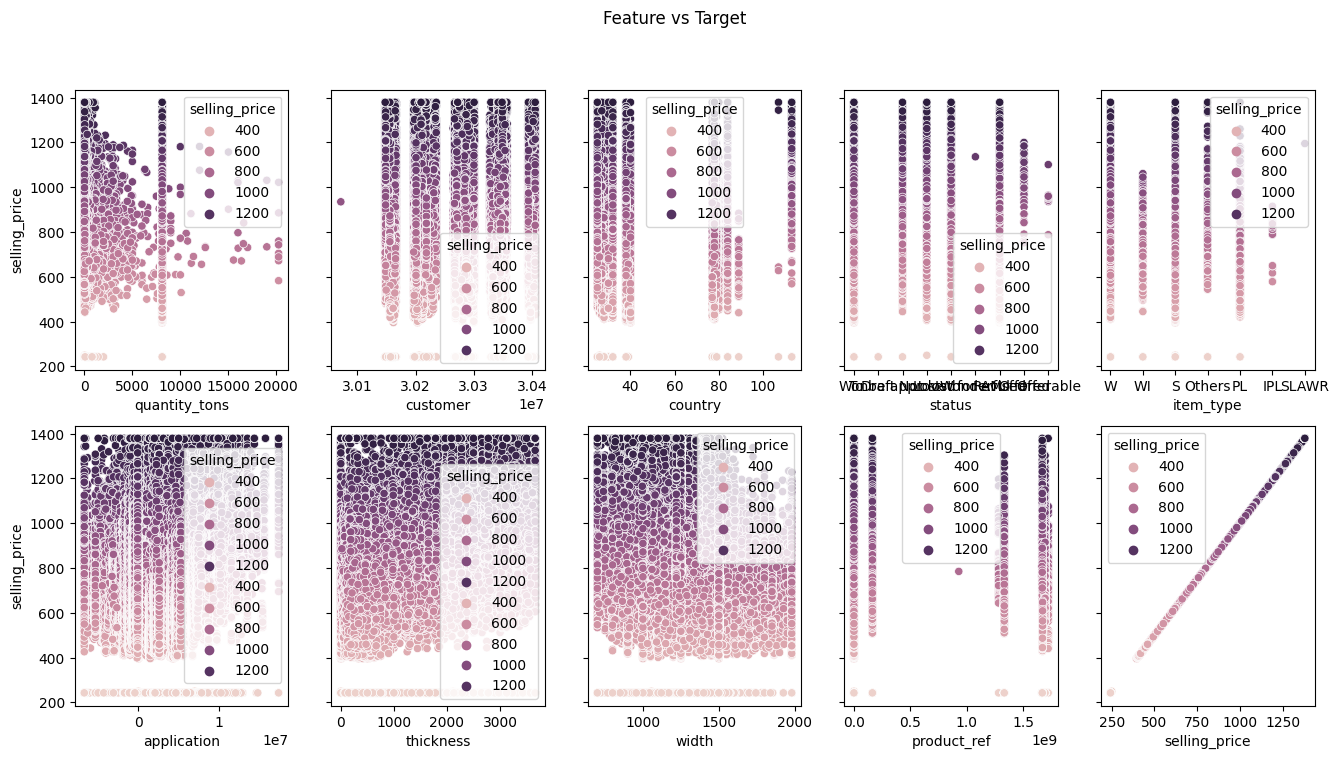

In [169]:
#Feature vs Target Plot
fig, axes = plt.subplots(2, 5, figsize=(16, 8), sharey=True)
fig.suptitle('Feature vs Target')
xc = 0
yc = 0
for i in df.columns[:-1]:
    sns.scatterplot(data=df, x=i, y='selling_price', hue='selling_price', ax=axes[xc, yc])
    yc = yc + 1
    if yc == 5:
        yc=0
        xc=1

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\2864817.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().abs(),  annot=True)


<Axes: >

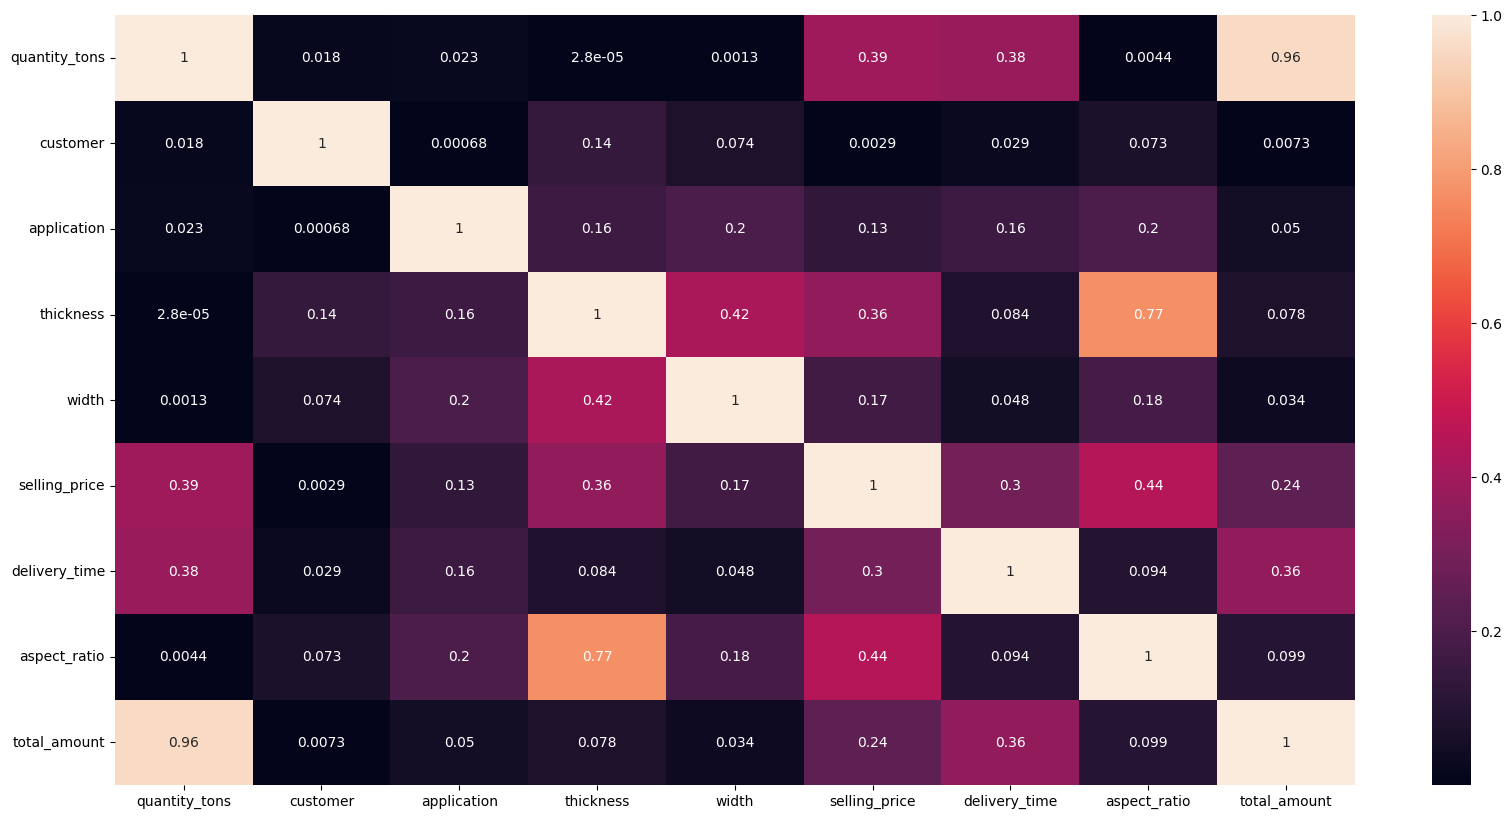

In [170]:
#HEATMAP FOR CORRELATION BETWEEN VARIABLES

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

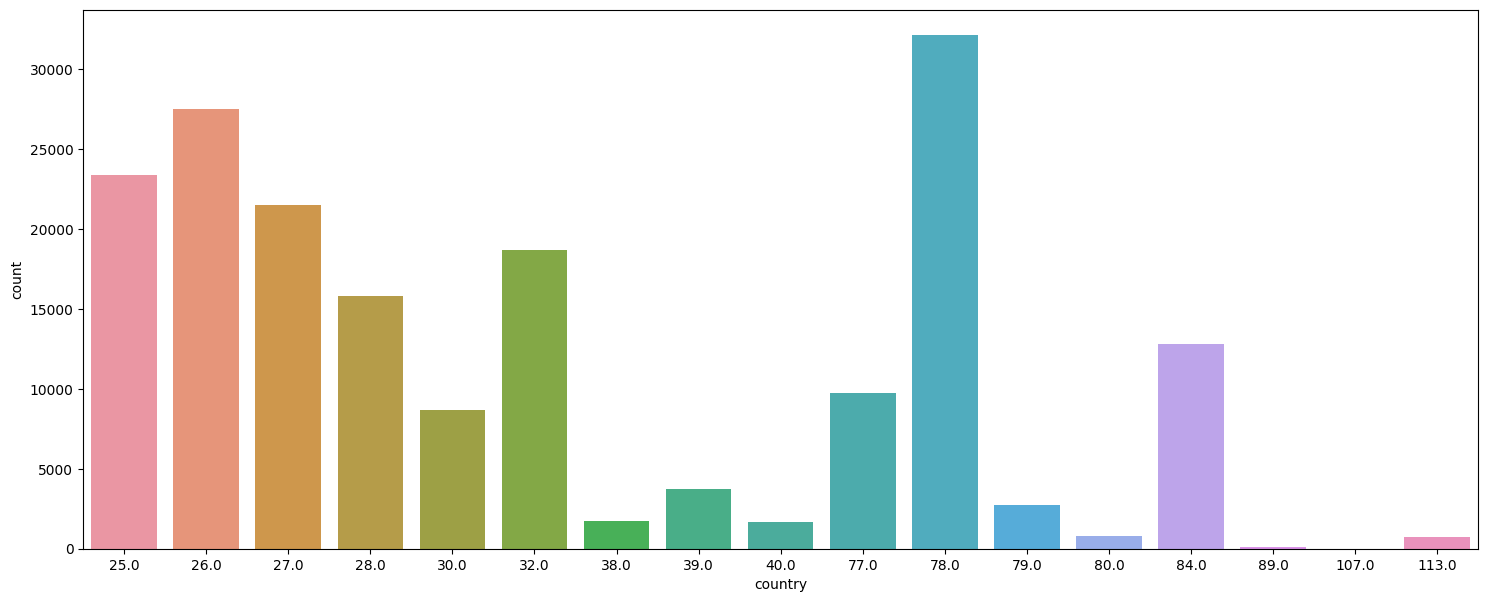

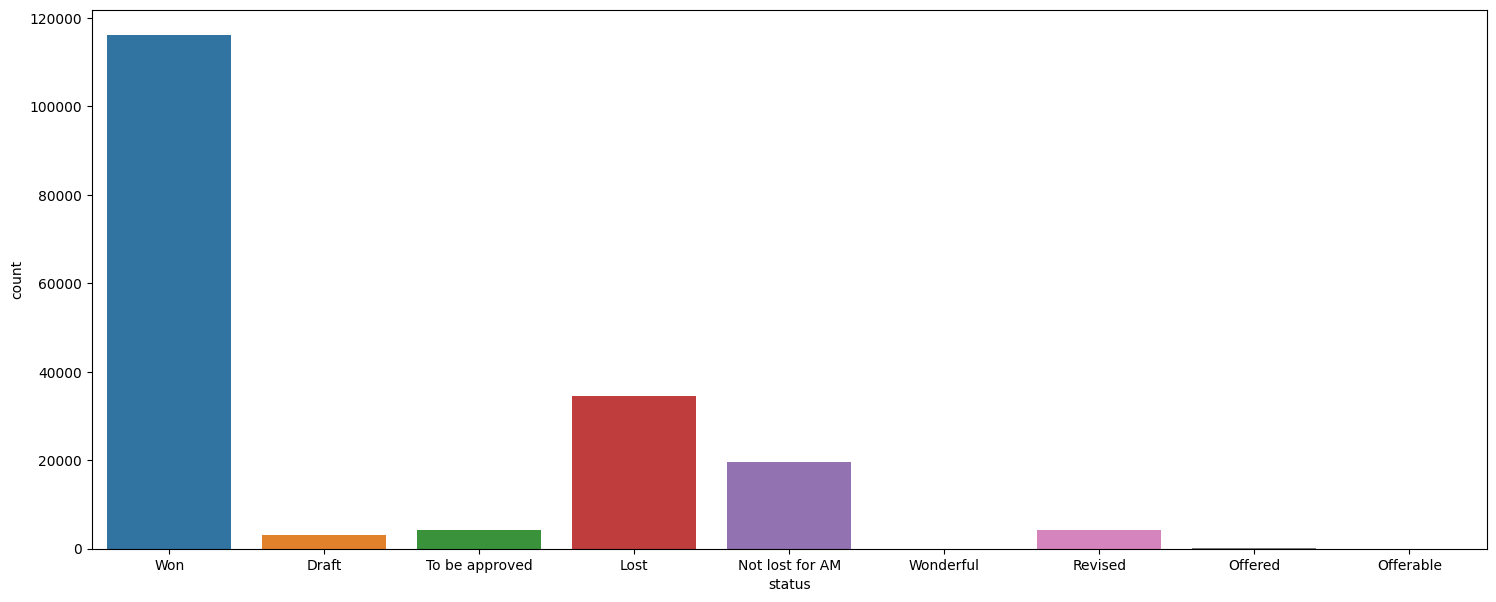

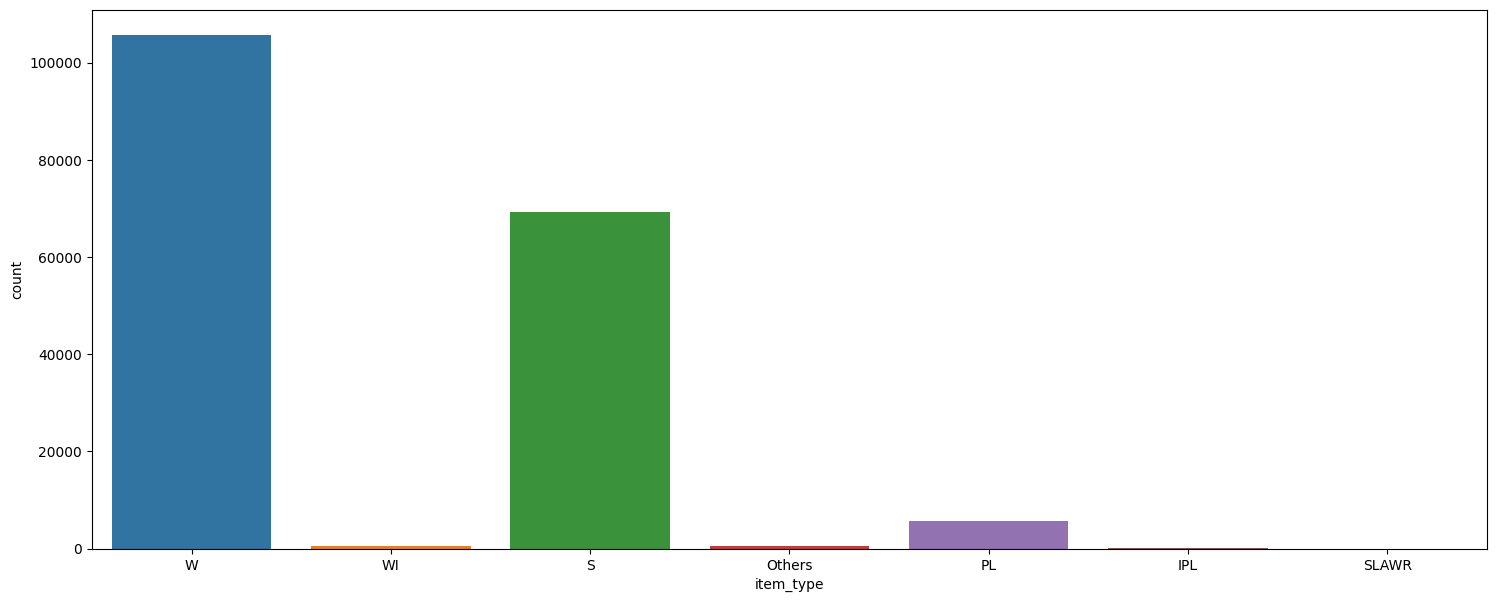

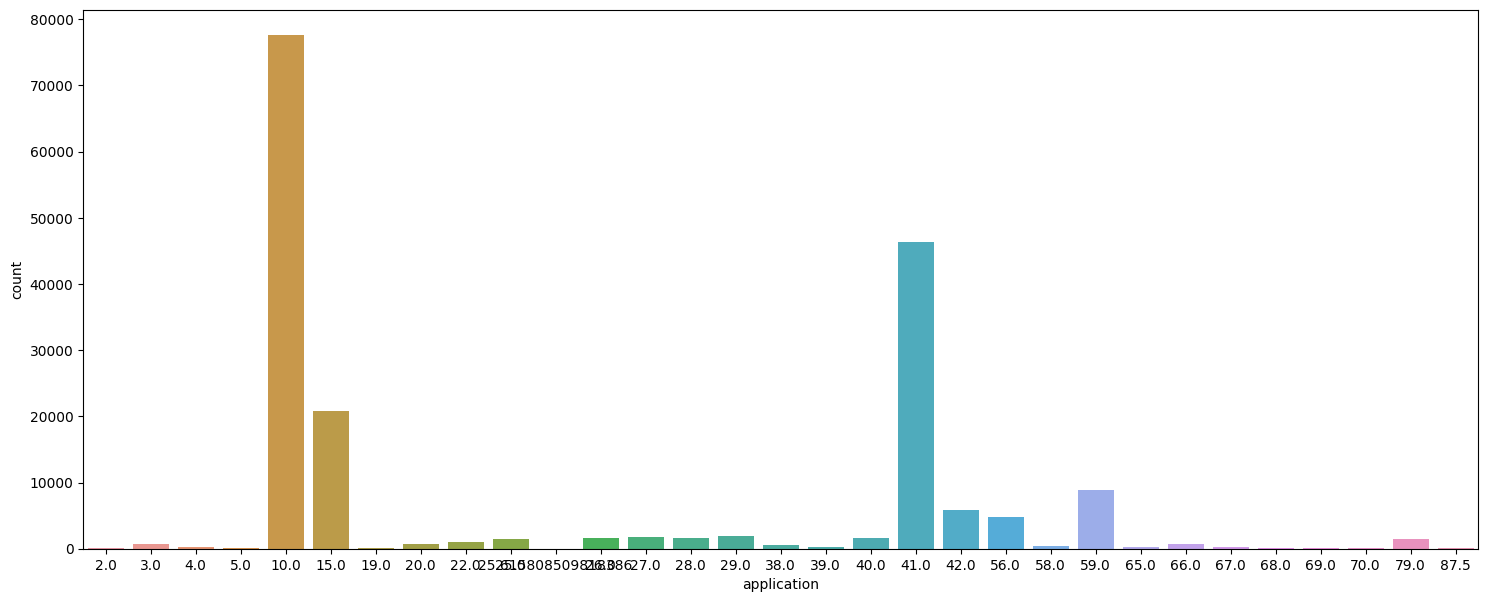

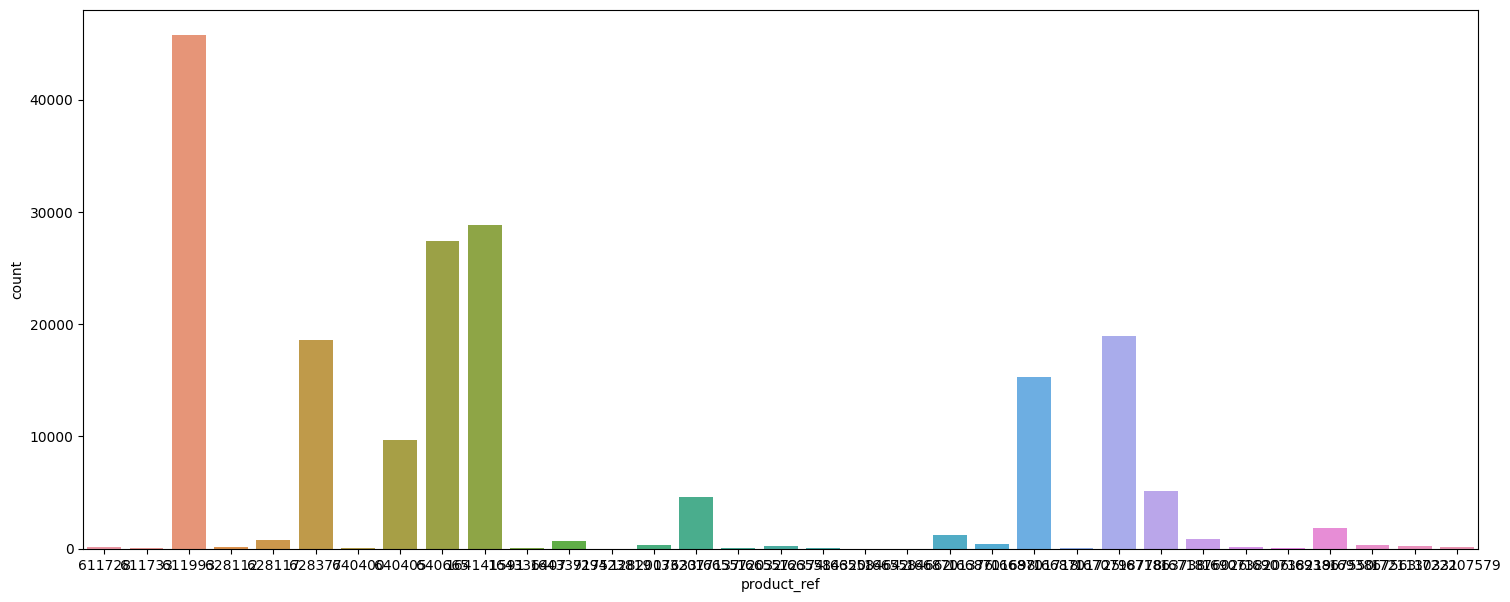

In [171]:
for i in df.columns:
    if(df[i].nunique()<35):
        plt.figure(figsize=(18, 7))
        sns.countplot(x=df[i])
        plt.show()

### Saving Clean data

In [172]:
def save_cleaned_data(df):
    clean_data = df.copy(deep=True)
    return df

In [173]:
class RegressorModel:
    
    def __init__(self, x_train, x_test, y_train, y_test):
        
        self.x_test = x_test
        self.x_train = x_train
        self.y_train = y_train
        self.y_test = y_test
    
    def initialize_models(self, reg_mod):

        seed = 1
        if reg_mod == 'Linear Regression':
            return LinearRegression(n_jobs = -1)
        if reg_mod == 'Lasso Regression':
            return Lasso(random_state = seed)
        if reg_mod == 'Ridge Regression':
            return Ridge(random_state = seed)
        if reg_mod == 'ElasticNet':
            return ElasticNet(random_state = seed)
        if reg_mod == 'Decision Tree Regressor':
            return DecisionTreeRegressor(random_state = seed, max_depth=None, min_samples_leaf=1, min_samples_split=2, max_features=None)
        if reg_mod == 'Extra Trees Regressor':
            return ExtraTreesRegressor(n_estimators=100)
        if reg_mod == 'XGB Regressor':
            return XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6)

    
    def cross_validate(self, model):
        neg_score = cross_val_score(model, self.x_train, self.y_train, cv = 5, n_jobs = -1, scoring = 'neg_mean_squared_error')
        score = np.round(np.sqrt(-1*neg_score), 5)
        return score.mean()
        
    def train_models(self, model):
        
        model = model.fit(self.x_train, self.y_train) # train
        y_pred = model.predict(self.x_test) # predict
        trcr = model.score(self.x_train, self.y_train)
        tscr = model.score(self.x_test, self.y_test) # evaluate (R2)
        return [trcr, tscr]
            
    def regressor_main(self, model):
        
        model_dict = []
        if model == 'All':
            models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'ElasticNet', 'Decision Tree Regressor', 'Extra Trees Regressor', 'XGB Regressor']
        else:
            models = [model]
        for mod in models:
            model = self.initialize_models(mod)
            rsme = self.cross_validate(model)
            r2_score = self.train_models(model)
            model_dict.append({'Model': mod, 'RSME': rsme, 'Train_Score': r2_score[0], 'Test_Score': r2_score[1]})
        return model_dict

In [174]:
def regression_analysis(df, model='All'):
    
    #Target Encoding
    df.update(df[[ 'item_type', 'country', 'product_ref', 'status']]
          .apply(lambda s: s.map(df['selling_price'].groupby(s).mean()))
          )
    
    #Splitting Data into Train and Test
    x = df[['quantity_tons', 'customer', 'country', 'status', 'item_type',
           'application', 'thickness', 'width', 'product_ref',
           'delivery_time', 'aspect_ratio', 'total_amount']].values
    y = df[['selling_price']].values
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 101)
    
    #Standarize the dataset before fitting it into the model
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    #Build
    reg_model = RegressorModel(x_train, x_test, y_train, y_test) #intialize regressor class
    reg_score = reg_model.regressor_main(model) #Calling main function in regressor class
    reg_mod = pd.DataFrame.from_dict(reg_score)
    
    
    return reg_mod.sort_values(by='Score', ascending=False)

In [175]:
class ClassificationModel:
    
    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_test = x_test
        self.x_train = x_train
        self.y_train = y_train
        self.y_test = y_test
        
        
    def log_reg_model(self):

        log_reg = LogisticRegression() # initialise the model
        log_reg.fit(self.x_train, self.y_train) #training the data
        y_pred = log_reg.predict_proba(self.x_test) #Predicting
        roc = roc_auc_score(self.y_test, y_pred[:,1]) #Evaluation
        return roc
  

    def knn_model(self):
        
        #Finding the best value for K hyper parameter based on higest cv score
        
        khp = 0
        hcv = 0
        """
        for i in [1,2,3,4,5,6,7,8,9,10]:
            knn = KNeighborsClassifier(i) #initialising the model
            knn.fit(self.x_train,self.y_train) # training the model
            if np.mean(cross_val_score(knn, self.x_train, self.y_train, cv=10, scoring = "roc_auc")) > hcv:
                hcv = np.mean(cross_val_score(knn, self.x_train, self.y_train, cv=10, scoring = "roc_auc"))
                khp = i
            else:
                break
        """
        
        #Input the kbest K value and fit the model
        knn = KNeighborsClassifier(6)
        knn.fit(self.x_train,self.y_train)
        y_pred = knn.predict(self.x_test)
        roc = roc_auc_score(self.y_test, y_pred)
        return roc

    
    def dec_tree_model(self):
        
        """
        khp = 0
        hcv = 0
        for i in [11,12,13,14,15]:
            knn = DecisionTreeClassifier(max_depth=i) #initialising the model
            knn.fit(self.x_train,self.y_train) # training the model
            if np.mean(cross_val_score(knn, self.x_train, self.y_train, cv=10, scoring = "roc_auc")) > hcv:
                hcv = np.mean(cross_val_score(knn, self.x_train, self.y_train, cv=10, scoring = "roc_auc"))
                khp = i
                print (i, hcv)
            else:
                break
        """

        dt = DecisionTreeClassifier(max_depth=14)
        dt.fit(self.x_train, self.y_train)
        y_pred = dt.predict(self.x_test)
        roc = roc_auc_score(self.y_test, y_pred)
        return roc
    
    def ens_model(self):

        model1 = LogisticRegression(random_state=1)
        model2 = tree.DecisionTreeClassifier(max_depth=9, random_state=1)
        model3 = KNeighborsClassifier(6)
        model = VotingClassifier(estimators=[('lr', model1), ('dt', model2),('knn',model3)], voting='soft') 
        model.fit(self.x_train, self.y_train)
        model.predict(self.x_test)
        y_pred = model.predict_proba(self.x_test)
        roc = roc_auc_score(self.y_test,y_pred[:,1])
        return roc
    
    def rf_model(self):

        rf = RandomForestClassifier(max_depth=10,n_estimators=100, max_features='sqrt')
        rf.fit(self.x_train, self.y_train) 
        y_pred = rf.predict(self.x_test)
        roc = roc_auc_score(self.y_test, y_pred)
        return roc
    
    def xg_model(self):
        
        model = XGBClassifier(learning_rate=0.5,n_estimators=100,verbosity=None)
        model.fit(self.x_train, self.y_train)
        y_pred = model.predict(self.x_test)
        roc = roc_auc_score(self.y_test, y_pred)
        return roc
    
    def claasfication_main(self, model):
        
        temp_dict = {'Model':[], 'Score':[]}
            
        if model == 'KNN' or model == 'All':
            knn_score = self.knn_model()
            temp_dict['Model'].append('KNN')
            temp_dict['Score'].append(knn_score)
            
        if model == 'Logistic Regression' or model == 'All':
            log_reg_score = self.log_reg_model()
            temp_dict['Model'].append('Logestic Regression')
            temp_dict['Score'].append(log_reg_score)
        
        if model == 'Decision Tree Classifier' or model == 'All':
            dec_score = self.dec_tree_model()
            temp_dict['Model'].append('Decision Tree Classifier')
            temp_dict['Score'].append(dec_score)
            
        if model == 'Voting Classifier' or model == 'All':
            ens_score = self.ens_model()
            temp_dict['Model'].append('Voting Classifier')
            temp_dict['Score'].append(ens_score)
        
        if model == 'Random Forest Classifier' or model == 'All':
            rf_score = self.rf_model()
            temp_dict['Model'].append('Random Forest Classifier')
            temp_dict['Score'].append(rf_score)
            
        if model == 'XGB Classifier' or model == 'All':
            xg_score = self.xg_model()
            temp_dict['Model'].append('XGB Classifier')
            temp_dict['Score'].append(xg_score)

        cls_df = pd.DataFrame.from_dict(data=temp_dict)
            
        return cls_df

In [176]:
def classification_analysis(df, model='All'):
    
    #Droping rows with status not as 'Won' or 'Lost'
    indexAge = df[ (df['status'] != 'Won') & (df['status'] != 'Lost') ].index
    df.drop(indexAge , inplace=True)
    
    #Get label encoding for status column
    df["status"] = df["status"].map({"Won":1,"Lost":0}) #encoding binary class data (run only once)
    
    #Target Encoding
    df.update(df[[ 'item_type', 'country', 'product_ref']]
          .apply(lambda s: s.map(df['status'].groupby(s).mean()))
          )
    
    #Splitting Data into Train and Test
    x = df[['quantity_tons', 'customer', 'country', 'item_type',
           'application', 'thickness', 'width', 'product_ref',
           'delivery_time', 'aspect_ratio', 'total_amount', 'selling_price']].values
    y = df[['status']].values
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 101)
    
    #Standarize the dataset before fitting it into the model
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    #Build
    clsmod = ClassificationModel(x_train, x_test, y_train, y_test) #Intialzie the class
    cls_mod = clsmod.claasfication_main(model) 
    return cls_mod.sort_values(by='Score', ascending=False)

In [177]:
def ml_execution(df, task, model):

    if task == 'Regression':
        df = regression_analysis(df, model)
    else:
        df = classification_analysis(df, model)
        
    return df

In [178]:
df_reg = df.copy(deep=True)
df_cls = df.copy(deep=True)

In [179]:
df_reg

,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,selling_price,delivery_time,aspect_ratio,total_amount
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,7862400.0,750.000000,4.624507e+04
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,0.0,1512.500000,8.041220e+05
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,-6739200.0,2505.263158,2.487938e+05
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,-6739200.0,572.608696,1.554517e+05
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,1980.0,640665,577.00,-2678400.0,500.000000,4.532487e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,8106.909692,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,591.00,-86400.0,1270.833333,4.791184e+06
181669,8106.909692,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,589.00,-86400.0,1578.947368,4.774970e+06
181670,8106.909692,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,619.00,-86400.0,1760.563380,5.018177e+06
181671,8106.909692,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,601.00,-86400.0,1470.588235,4.872253e+06


In [180]:
reg_score = ml_execution(df_reg, 'Regression', 'All')
reg_score

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9264\3304260973.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit(self.x_train, self.y_train) # train


,Model,RSME,Train_Score,Test_Score
0,Linear Regression,115.149650,0.696427,0.696478
1,Lasso Regression,115.417744,0.695003,0.694922
2,Ridge Regression,115.149648,0.696427,0.696478
3,ElasticNet,129.788848,0.614264,0.613006
4,Decision Tree Regressor,58.650278,0.999999,0.927852
5,Extra Trees Regressor,45.689028,0.999999,0.958653
6,XGB Regressor,47.867822,0.952466,0.948350


In [182]:
cls_score = ml_execution(df_cls, 'Classification', 'All')
cls_score

C:\Users\ADMIN\anaconda3\envs\py3.10\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ADMIN\anaconda3\envs\py3.10\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\anaconda3\envs\py3.10\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\anaconda3\envs\py3.10\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was e

,Model,Score
3,Voting Classifier,0.946308
5,XGB Classifier,0.902067
2,Decision Tree Classifier,0.873396
0,KNN,0.863892
1,Logestic Regression,0.822130
4,Random Forest Classifier,0.782599


### Streamlit App

In [ ]:
import streamlit as st

# Define the Streamlit app
def app():
    st.set_page_config(page_title="twitter scraper", layout="wide", initial_sidebar_state="collapsed")
    
    
    # Title and header to be dispalyed
    colT1, colT2 = st.columns([3, 5])
    with colT2:
        title = st.title(' :blue[Industrial Copper Modeling]')
    
    
    #Input Fields
    col1, col2, col3 = st.columns([1, 1, 1])
    
    with col1:
        # Add a dropdown to select regression or classification
        task = st.selectbox('Select task', ['Regression', 'Classification'])

    with col2:
    # Add a dependent dropdown to select the model
        if task == 'Regression':
            models = ['All', 'Linear Regression', 'Lasso Regression', 'Ridge Regression', 'ElasticNet', 'Decision Tree Regressor', 'Extra Trees Regressor', 'XGB Regressor']
        else:
            models = ['All', 'Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Voting Classifier', 'Random Forest Classifier', 'XGB Classifier']

        model = st.selectbox('Select model', models)
    
        
    with col3:
        # Upload the CSV file
        file = st.file_uploader('Upload a CSV file', type=['csv'])


    if file is not None:
        # Load the CSV file into a DataFrame
        df = import_data(file)
        
        df = clean_data(df)

        # Run the ML code on the DataFrame with the selected model
        if task == 'Regression':
            if model == 'All':
                results = ml_execution(df, task, 'All')
            if model == 'Linear Regression':
                results = ml_execution(df, task, 'Linear Regression')
            elif model == 'Lasso Regression':
                results = ml_execution(df, task, 'Lasso Regression')
            elif model == 'Ridge Regression':
                results = ml_execution(df, task, 'Ridge Regression')
            elif model == 'ElasticNet':
                results = ml_execution(df, task, 'ElasticNet')
            elif model == 'Decision Tree Regressor':
                results = ml_execution(df, task, 'Decision Tree Regressor')
            elif model == 'Extra Trees Regressor':
                results = ml_execution(df, task, 'Extra Trees Regressor')
            elif model == 'XGB Regressor':
                results = ml_execution(df, task, 'XGB Regressor')
        else:
            if model == 'Logistic Regression':
                results = ml_execution(df, task, 'Logistic Regression')
            elif model == 'KNN':
                results = ml_execution(df, task, 'KNN')
            elif model == 'Decision Tree Classifier':
                results = ml_execution(df, task, 'Decision Tree Classifier')
            elif model == 'Voting Classifier':
                results = ml_execution(df, task, 'Voting Classifier')
            elif model == 'Random Forest Classifier':
                results = ml_execution(df, task, 'Random Forest Classifier')
            elif model == 'XGB Classifier':
                results = ml_execution(df, task, 'XGB Classifier')

        # Display the results DataFrame
        st.write(results)

if __name__ == '__main__':
    app()